#**GATHERING DATA**

In [1]:
import pandas as pd   #Library for manipualtion and filtering the data.
import numpy as np  #Library for scientific computing.
import matplotlib.pyplot as plt  #Library for Data visualization.
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
#Importing Churn Dataset using read_csv in pandas.
df = pd.read_csv("churn.csv")

In [3]:
#"head()" used to get first 5 rows of dataset.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.replace(' ', np.nan, inplace=True)

In [6]:
df.dropna(inplace=True)

In [7]:
#"isnull().sum()" give total null values in each column in dataset.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [9]:
#"describe()" used to give statistics for numerical parameteric column.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


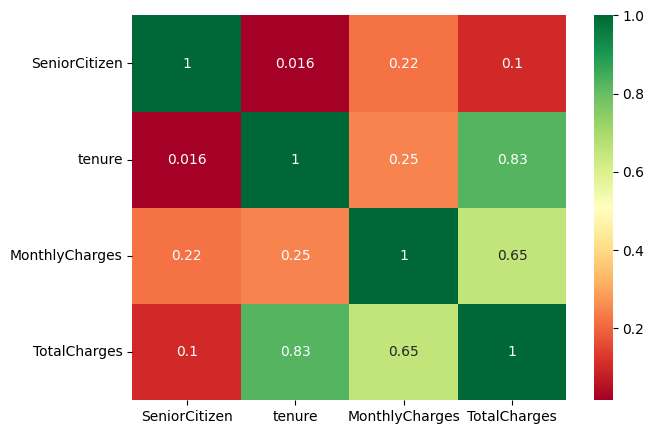

In [10]:
#Defining the correlation between the attributes.
corr_df = df.corr()
top_corr_fig = corr_df.index
plt.figure(figsize=(7,5))
sns.heatmap(df[top_corr_fig].corr(), annot=True, cmap ="RdYlGn")
plt.show()

In [11]:
#Dataset has 7043 rows and 21 columns.
df.shape

(7032, 21)

In [12]:
#"nunique()" used to distinct values in each column in dataset.
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
#Extracting out the values count in columns using loop and "value_counts()".
columnss = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
for i in columnss:
  print(df[i].value_counts())
  print("\n--------------------------------------\n")

Male      3549
Female    3483
Name: gender, dtype: int64

--------------------------------------

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

--------------------------------------

No     3639
Yes    3393
Name: Partner, dtype: int64

--------------------------------------

No     4933
Yes    2099
Name: Dependents, dtype: int64

--------------------------------------

Yes    6352
No      680
Name: PhoneService, dtype: int64

--------------------------------------

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

--------------------------------------

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

--------------------------------------

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

--------------------------------------

No                     3087
Yes                    2425
No internet servi

#**FEATURE ENGINEERING**

#####Column : Tenure

<Axes: >

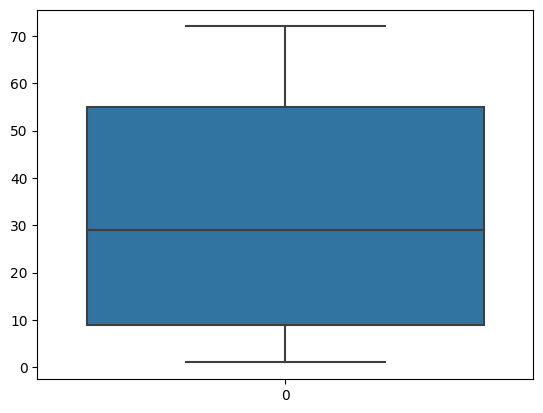

In [15]:
sns.boxplot((df["tenure"]))

##### Column : Monthly Charges

<Axes: >

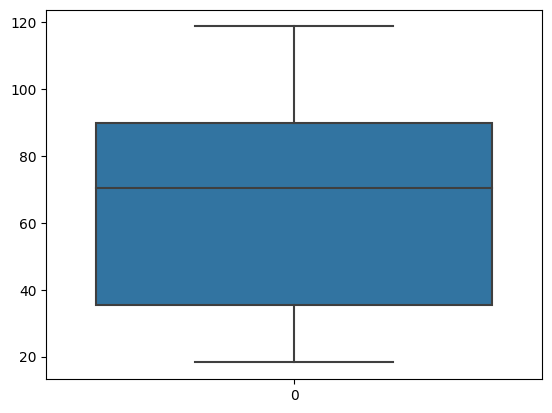

In [16]:
sns.boxplot((df["MonthlyCharges"]))

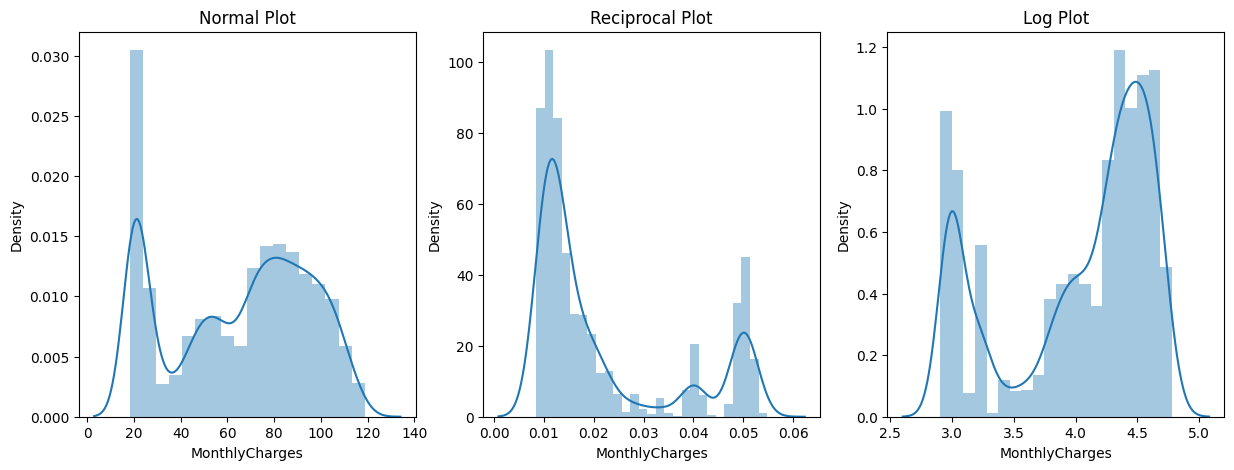

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.distplot(df["MonthlyCharges"])
plt.title("Normal Plot")

plt.subplot(1,4,2)
sns.distplot(np.reciprocal(df["MonthlyCharges"]))
plt.title("Reciprocal Plot")

plt.subplot(1,4,3)
sns.distplot(np.log(df["MonthlyCharges"]))
plt.title("Log Plot")
plt.show()

#####Column : Total Charges

<Axes: >

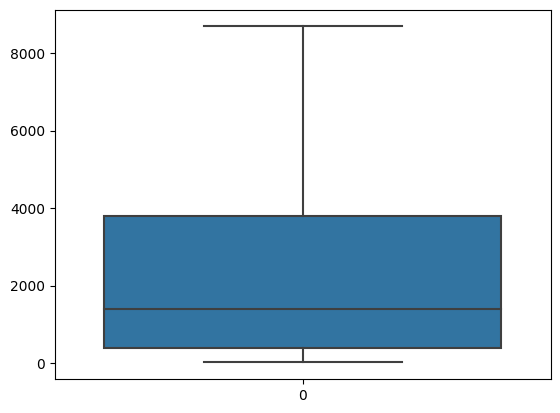

In [18]:
sns.boxplot(df["TotalCharges"])

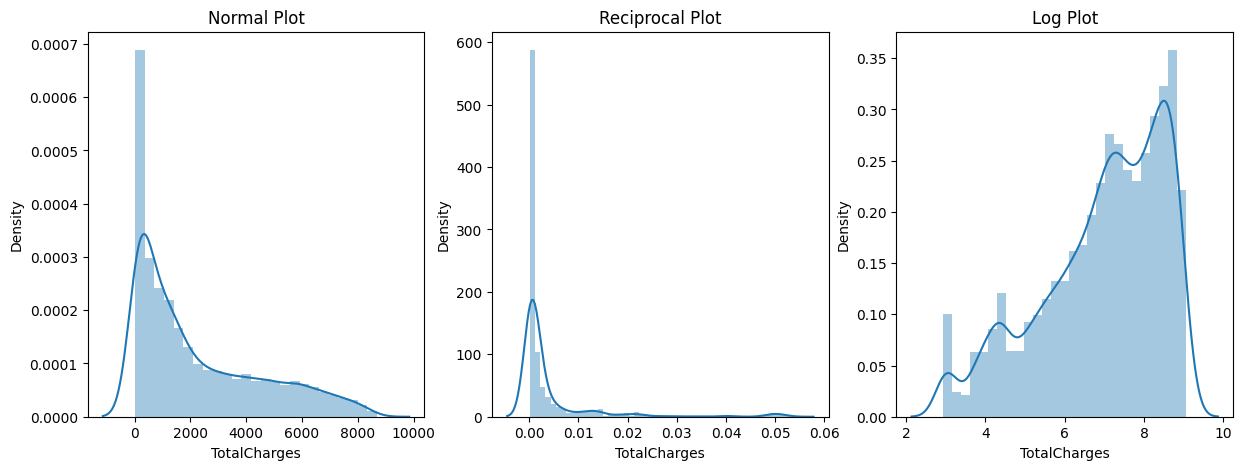

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.distplot(df["TotalCharges"])
plt.title("Normal Plot")

plt.subplot(1,4,2)
sns.distplot(np.reciprocal(df["TotalCharges"]))
plt.title("Reciprocal Plot")

plt.subplot(1,4,3)
sns.distplot(np.log(df["TotalCharges"]))
plt.title("Log Plot")
plt.show()

#**EDA**

In [20]:
#To see the percentage of customers that are leaving.
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]

# print the percentage of customers that stayed.
print(round((numRetained/(numRetained + numChurned) * 100),2),'% of customers stayed in the company')
# peint the percentage of customers that left.
print(round((numChurned/(numRetained + numChurned) * 100),2), '% of customers left with the company')

73.42 % of customers stayed in the company
26.58 % of customers left with the company


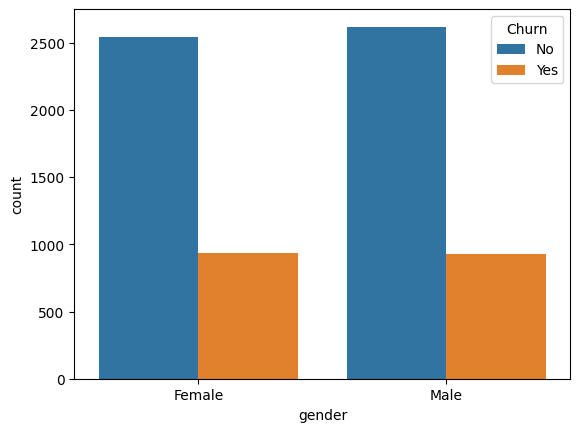

In [21]:
#Visualize the churn count for both males and females.
sns.countplot(x ='gender', hue='Churn', data=df)
plt.show()

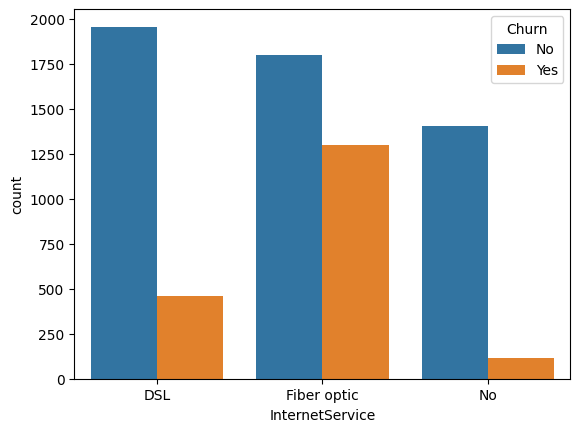

In [22]:
#Visualize the churn count for the internet service.
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.show()

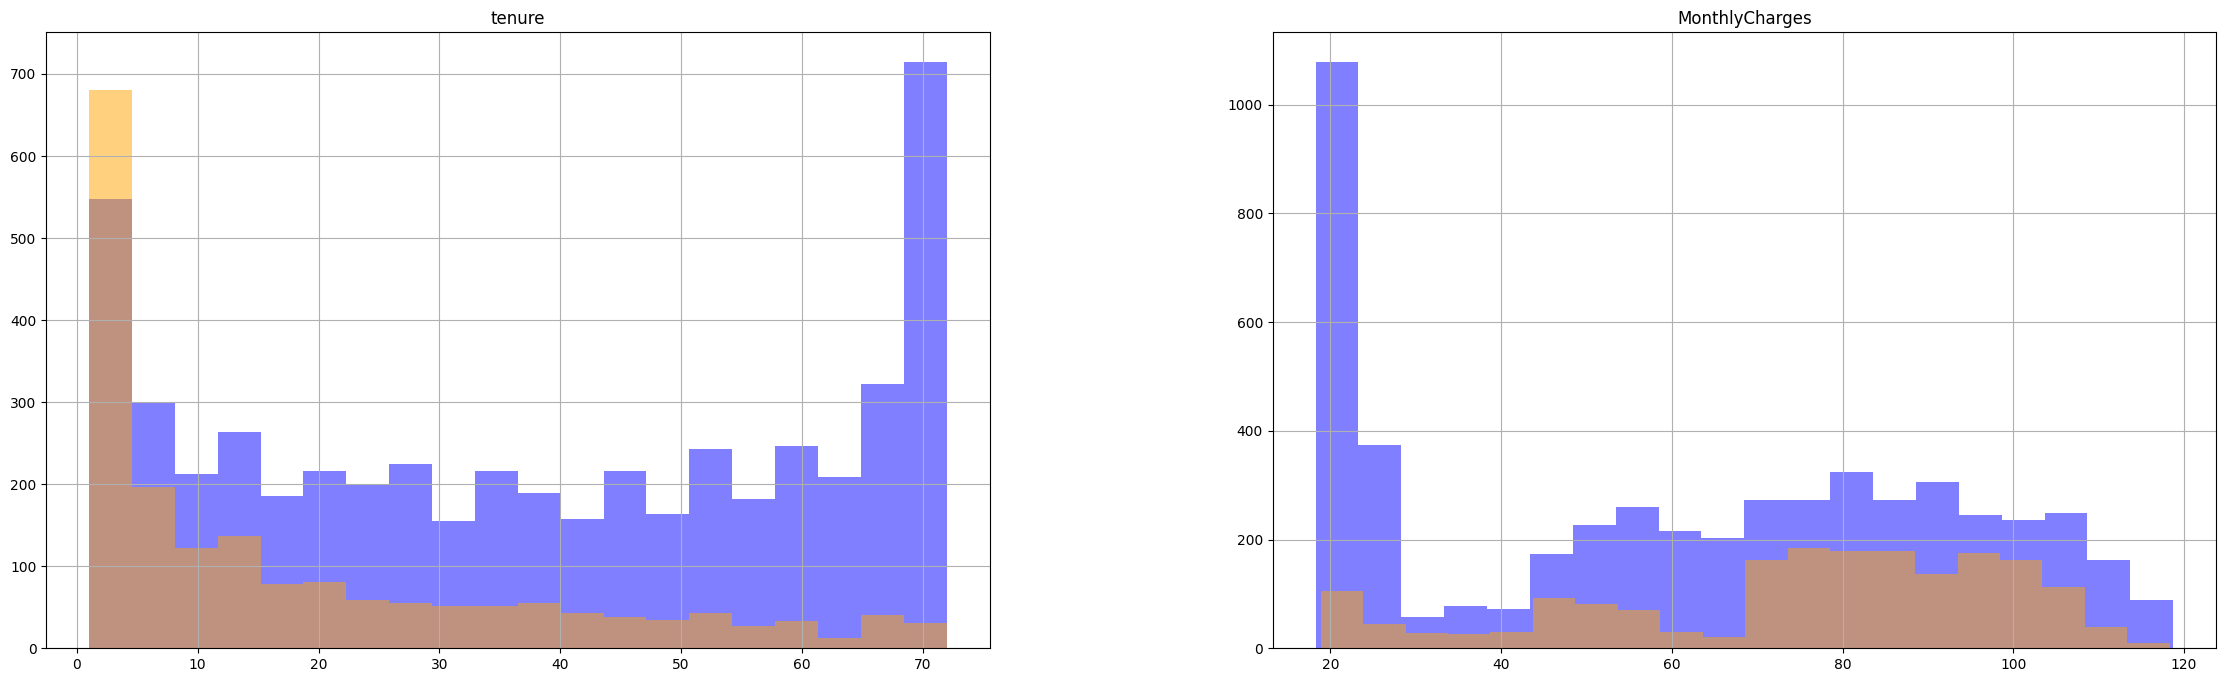

In [23]:
#To Visualize Numeric data.
numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
df[df.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

#**FEATURE SCALING**

###Feature Splitting

In [24]:
df.drop(["customerID"], axis=1, inplace =True)

In [25]:
#Dividing into Independent and Dependent Variable.
X = df.drop(["Churn"], axis=1)
y = df["Churn"]

In [26]:
y.replace("No", 0, inplace = True)
y.replace("Yes", 1, inplace = True)

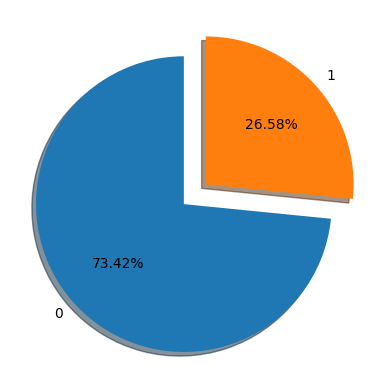

In [27]:
#Using Pie Chart, Plotting the Label feature without SMOTE technique.
plt.pie(y.value_counts(), labels = y.unique(), startangle = 90, shadow = True, explode=(0.1, 0.1), autopct = '%1.2f%%')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [29]:
#Getting the shape of training and test dataset.
print("Train : ",X_train.shape, y_train.shape)
print("Test : ",X_test.shape, y_test.shape)

Train :  (5274, 19) (5274,)
Test :  (1758, 19) (1758,)


In [30]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3540,Female,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),108.65,7726.35
3504,Male,0,Yes,Yes,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1377.70
6715,Female,0,No,No,11,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,990.30
2866,Female,0,No,No,12,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.60,1017.35
6609,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.10,20.10


###Categorical Encoding

In [31]:
# Importing ColumnTransformer, OneHotEncoder & OrdinalEncoder.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


transformer = ColumnTransformer(transformers = [
        ("cat1", OneHotEncoder(sparse = False, drop = "first"), [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15]),
        ("cat2", OrdinalEncoder(categories=[["Electronic check", "Mailed check", "Bank transfer (automatic)", 
                                             "Credit card (automatic)"]]), [16])
                ], remainder= "passthrough")



#Using fit_transform to the train data.
X_train = transformer.fit_transform(X_train)

#"transform" only to avoid data leakage.
X_test = transformer.transform(X_test)

###SMOTE Technique

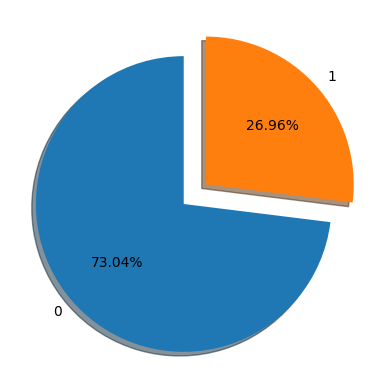

In [32]:
plt.pie(y_train.value_counts(), labels = y_train.unique(), startangle = 90, shadow = True, explode=(0.1, 0.1), autopct = '%1.2f%%')
plt.show()

In [33]:
#Importing the SMOTE from the imblearn.
from imblearn.over_sampling import SMOTE

#Defining the smote for SMOTE with neighbour 5 and random state 130.
smote = SMOTE(random_state = 130, k_neighbors = 5)

# Fitting and resampling training data values
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

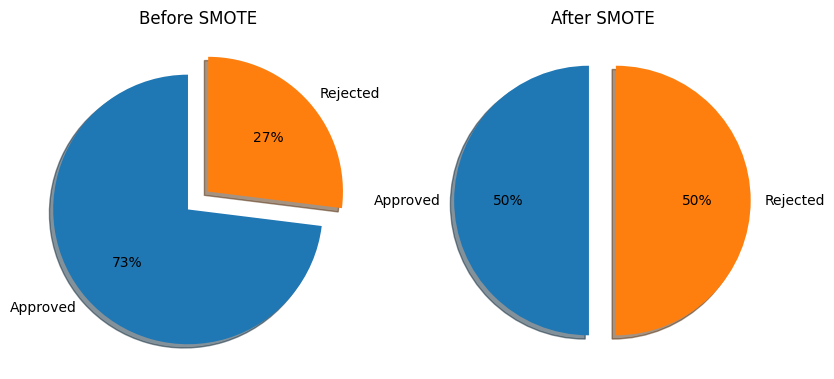

In [34]:
#Plotting the Before SMOTE and After SMOTE pie chart.
plt.figure(figsize=(20,15))
plt.subplot(1,4,1)
plt.pie(y_train.value_counts(), labels = ["Approved", "Rejected"], startangle = 90, shadow = True, explode=(0.1, 0.1), autopct = '%1.0f%%')
plt.title("Before SMOTE")

plt.subplot(1,4,2)
plt.pie(y_train_sm.value_counts(), labels = ["Approved", "Rejected"], startangle = 90, shadow = True, explode=(0.1, 0.1), autopct = '%1.0f%%')
plt.title("After SMOTE")
plt.show()

###Standardization

In [35]:
#Importing Standardization from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Using fit_transform to the train data.
X_train = scaler.fit_transform(X_train)
X_train_sm = scaler.fit_transform(X_train_sm)

#"transform" only to avoid data leakage.
X_test = scaler.transform(X_test)

#**MODEL SELECTION**

###**LOGISTIC REGRESSION**

####Baseline Logistic Regression

In [36]:
#Importing Logistic Regression from sklearn.
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

#Fitting the training independent and dependent variable to get trained.
log_reg.fit(X_train,y_train)

#Predicting the result foe the test dataset "X_test".
y_pred_log = log_reg.predict(X_test)

In [37]:
#Importing accuracy_score, confusion_matrix, classification_report from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

#Calculating the accuracy for the predicted and actual dataset.
Log_reg_untune = accuracy_score(y_pred_log, y_test)*100
print("Accuracy of Logistic Regression Model : {}%".format(round(accuracy_score(y_pred_log, y_test)*100)))

Accuracy of Logistic Regression Model : 80%


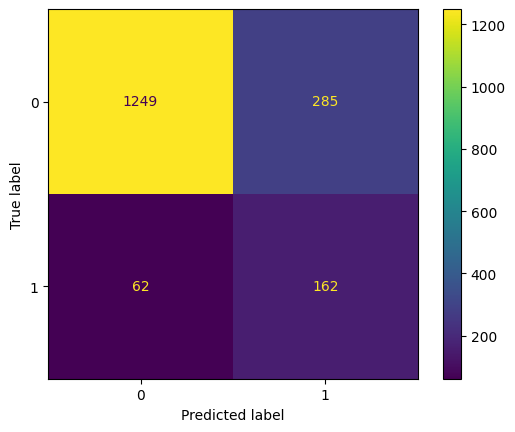

In [38]:
#Calculating for the confusion matrix.
cm_log = confusion_matrix(y_pred_log, y_test, labels= log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_reg.classes_)
disp.plot()
plt.show()

In [39]:
#Getting the Classification report for precision, recall & f1-score value.
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred_log, y_test))

Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       0.95      0.81      0.88      1534
           1       0.36      0.72      0.48       224

    accuracy                           0.80      1758
   macro avg       0.66      0.77      0.68      1758
weighted avg       0.88      0.80      0.83      1758



<Axes: xlabel='Churn', ylabel='Density'>

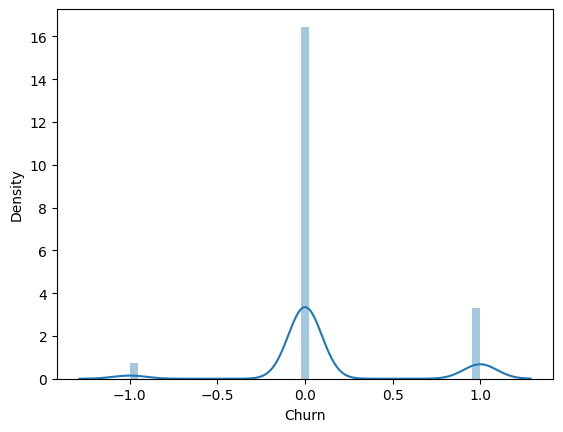

In [40]:
#Plotting the test - predicted graph.
sns.distplot(y_test - y_pred_log)

####SMOTE Logistic Regresion

In [41]:
log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train_sm, y_train_sm)

#Predicting the result foe the test dataset "X_test".
log_reg_smotee = log_reg_smote.predict(X_test)

print("Accuracy of Logistic Regression Model : {}%".format(round(accuracy_score(log_reg_smotee, y_test)*100)))
lg_smote_score = accuracy_score(log_reg_smotee, y_test)*100
#Calculating for the confusion matrix.
confusion_matrix(log_reg_smotee, y_test)

Accuracy of Logistic Regression Model : 75%


array([[968,  95],
       [343, 352]])

###**DECISION TREE CLASSIFIER**

####Baseline Decision Tree

In [42]:
#Importing DecisionTreeClassifier from sklearn.
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

#Fitting the training independent and dependent variable to get trained.
dec_tree.fit(X_train,y_train)

#Predicting the result foe the test dataset "X_test".
y_pred_dec = dec_tree.predict(X_test)

In [43]:
#Calculating the accuracy for the predicted and actual dataset.
dec_tree_untune = accuracy_score(y_pred_dec, y_test)*100
accuracy_score(y_pred_dec, y_test)*100

72.07053469852104

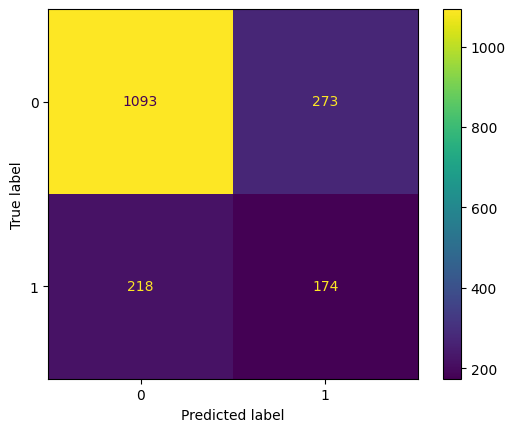

In [44]:
#Calculating for the confusion matrix.
dt = confusion_matrix(y_pred_dec, y_test, labels= dec_tree.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=dt, display_labels=dec_tree.classes_)
disp2.plot()
plt.show()

In [45]:
#Importing accuracy_score, confusion_matrix, classification_report from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred_dec, y_test))

Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      1366
           1       0.39      0.44      0.41       392

    accuracy                           0.72      1758
   macro avg       0.61      0.62      0.62      1758
weighted avg       0.73      0.72      0.73      1758



<Axes: xlabel='Churn', ylabel='Density'>

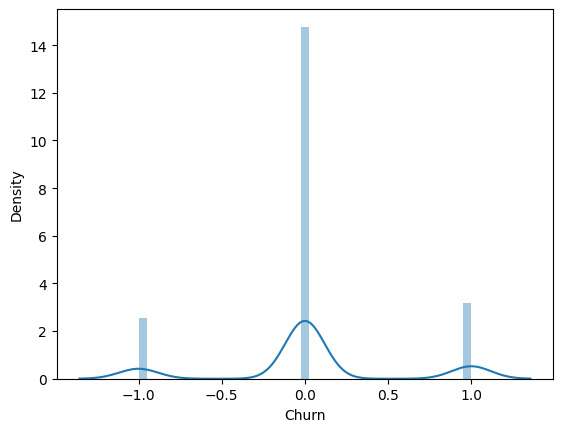

In [46]:
#Plotting the test - predicted graph.
sns.distplot(y_test - y_pred_dec)

####SMOTE Decision Tree

In [47]:
dt_smote = DecisionTreeClassifier()
dt_smote.fit(X_train_sm, y_train_sm)

#Predicting the result foe the test dataset "X_test".
dt_smotee = dt_smote.predict(X_test)

print("Accuracy of Decision Tree Model : {}%".format(round(accuracy_score(dt_smotee, y_test)*100)))
dt_smote_score = accuracy_score(dt_smotee, y_test)*100
#Calculating for the confusion matrix.
confusion_matrix(dt_smotee, y_test)

Accuracy of Decision Tree Model : 72%


array([[1065,  239],
       [ 246,  208]])

###**KNN**

####Baseline KNN

In [48]:
#Importing KNeighborsClassifier from sklearn.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#Fitting the training independent and dependent variable to get trained.
knn.fit(X_train,y_train)

#Predicting the result foe the test dataset "X_test".
y_pred_knn = knn.predict(X_test)

In [49]:
#Calculating the accuracy for the predicted and actual dataset.
knn_untune = accuracy_score(y_pred_knn, y_test)*100
accuracy_score(y_pred_knn, y_test)*100

76.39362912400455

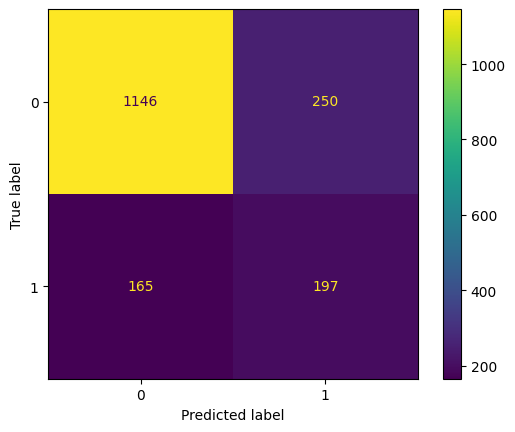

In [50]:
#Calculating for the confusion matrix.
knn_cm = confusion_matrix(y_pred_knn, y_test, labels= knn.classes_)
disp4 = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn.classes_)
disp4.plot()
plt.show()

In [51]:
#Importing accuracy_score, confusion_matrix, classification_report from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred_knn, y_test))

Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      1396
           1       0.44      0.54      0.49       362

    accuracy                           0.76      1758
   macro avg       0.66      0.68      0.67      1758
weighted avg       0.78      0.76      0.77      1758



<Axes: xlabel='Churn', ylabel='Density'>

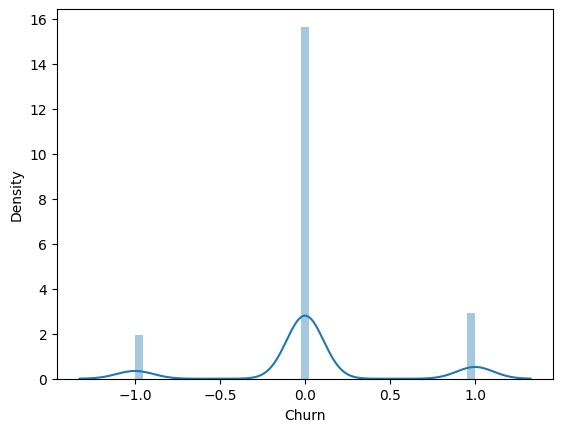

In [52]:
#Plotting the test - predicted graph.
sns.distplot(y_test - y_pred_knn)

####SMOTE KNN

In [53]:
knn_smote = KNeighborsClassifier()
knn_smote.fit(X_train_sm, y_train_sm)

#Predicting the result foe the test dataset "X_test".
knn_smotee = knn_smote.predict(X_test)

print("Accuracy of Decision Tree Model : {}%".format(round(accuracy_score(knn_smotee, y_test)*100)))
knn_smote_score = accuracy_score(knn_smotee, y_test)*100
#Calculating for the confusion matrix.
confusion_matrix(knn_smotee, y_test)
     

Accuracy of Decision Tree Model : 71%


array([[924, 131],
       [387, 316]])

###**RANDOM FOREST CLASSFIER**

####Baseline Random Forest

In [54]:
#Importing RandomForestClassifier from sklearn.
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

#Fitting the training independent and dependent variable to get trained.
random_forest.fit(X_train,y_train)

#Predicting the result foe the test dataset "X_test".
y_pred_rfc = random_forest.predict(X_test)

In [55]:
#Calculating the accuracy for the predicted and actual dataset.
random_forest_untune = accuracy_score(y_pred_rfc, y_test)*100
accuracy_score(y_pred_rfc, y_test)*100

79.806598407281

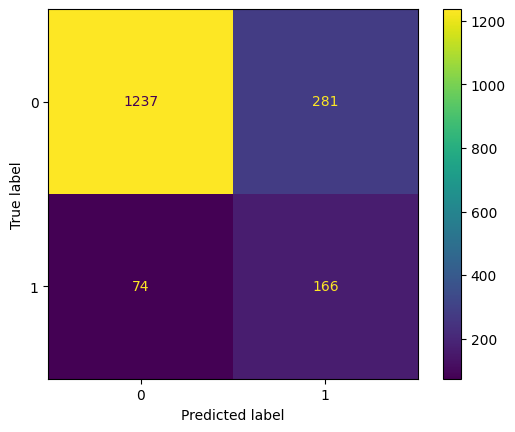

In [56]:
#Calculating for the confusion matrix.
rf_cm = confusion_matrix(y_pred_rfc, y_test, labels= random_forest.classes_)
disp6 = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=random_forest.classes_)
disp6.plot()
plt.show()

In [57]:
#Importing accuracy_score, confusion_matrix, classification_report from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred_rfc, y_test))

Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      1518
           1       0.37      0.69      0.48       240

    accuracy                           0.80      1758
   macro avg       0.66      0.75      0.68      1758
weighted avg       0.87      0.80      0.82      1758



<Axes: xlabel='Churn', ylabel='Density'>

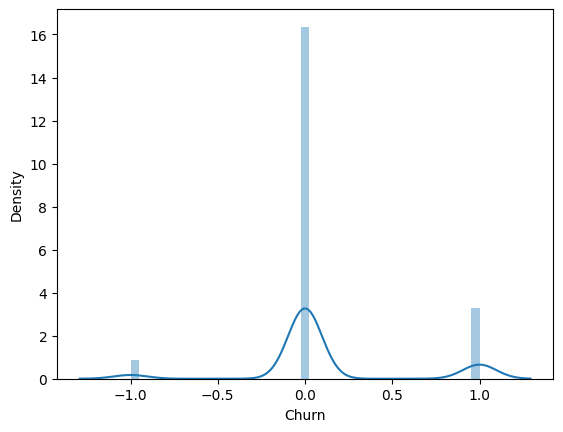

In [58]:
sns.distplot(y_test - y_pred_rfc)

####SMOTE Random Forest

In [59]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_train_sm, y_train_sm)

#Predicting the result foe the test dataset "X_test".
rf_smotee = rf_smote.predict(X_test)

print("Accuracy of Decision Tree Model : {}%".format((accuracy_score(rf_smotee, y_test)*100)))
rf_smote_score = accuracy_score(rf_smotee, y_test)*100

Accuracy of Decision Tree Model : 79.01023890784982%


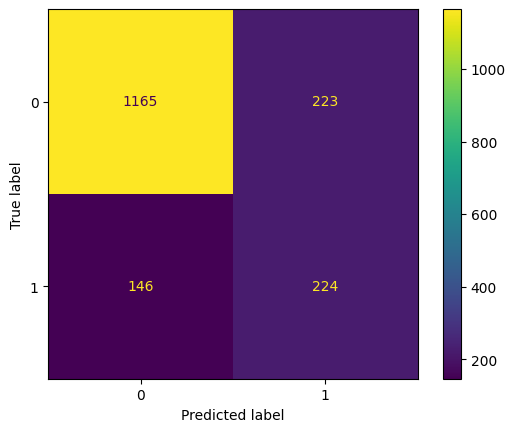

In [60]:
#Calculating for the confusion matrix.
rf_cm_smote = confusion_matrix(rf_smotee, y_test, labels= rf_smote.classes_)
disp6 = ConfusionMatrixDisplay(confusion_matrix=rf_cm_smote, display_labels=rf_smote.classes_)
disp6.plot()
plt.show()

In [61]:
print("Classification Report of Logistic Regression Model : \n",classification_report(rf_smotee, y_test))

Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      1388
           1       0.50      0.61      0.55       370

    accuracy                           0.79      1758
   macro avg       0.69      0.72      0.71      1758
weighted avg       0.81      0.79      0.80      1758



###**XGBOOST**

####Baseline XG Boost

In [62]:
#Importing XGBoost.
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

#Fitting the training independent and dependent variable to get trained.
xgb_classifier.fit(X_train,y_train)

#Predicting the result foe the test dataset "X_test".
y_pred_xgb = xgb_classifier.predict(X_test)

In [63]:
#Calculating the accuracy for the predicted and actual dataset.
xgb_untune = accuracy_score(y_pred_xgb, y_test)*100
accuracy_score(y_pred_xgb, y_test)*100

76.96245733788396

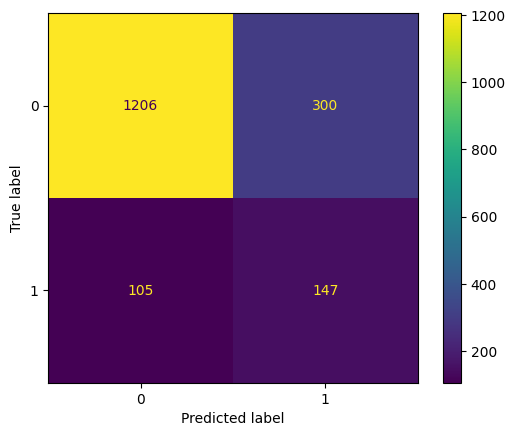

In [64]:
#Calculating for the confusion matrix.
xgb_cm = confusion_matrix(y_pred_xgb, y_test, labels= xgb_classifier.classes_)
disp8 = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_classifier.classes_)
disp8.plot()
plt.show()

In [65]:
#Importing accuracy_score, confusion_matrix, classification_report from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred_xgb, y_test))

Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       0.92      0.80      0.86      1506
           1       0.33      0.58      0.42       252

    accuracy                           0.77      1758
   macro avg       0.62      0.69      0.64      1758
weighted avg       0.84      0.77      0.79      1758



<Axes: xlabel='Churn', ylabel='Density'>

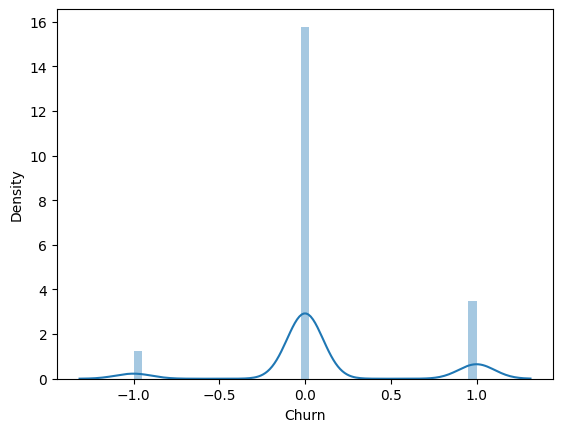

In [66]:
#Plotting the test - predicted graph.
sns.distplot(y_test - y_pred_xgb)

####SMOTE XG Boost

In [67]:
xgb_smote = xgb.XGBClassifier()
xgb_smote.fit(X_train_sm, y_train_sm)

#Predicting the result foe the test dataset "X_test".
xgb_smotee = xgb_smote.predict(X_test)

print("Accuracy of Decision Tree Model : {}%".format(round(accuracy_score(xgb_smotee, y_test)*100)))
xgb_smote_score = accuracy_score(xgb_smotee, y_test)*100
#Calculating for the confusion matrix.
confusion_matrix(xgb_smotee, y_test)

Accuracy of Decision Tree Model : 79%


array([[1156,  212],
       [ 155,  235]])

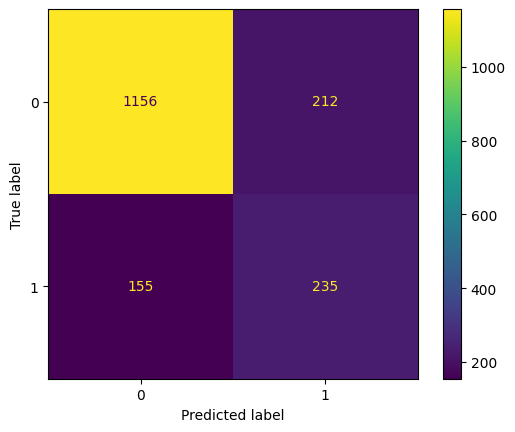

In [68]:
xgb_smote_cm = confusion_matrix(xgb_smotee, y_test, labels= xgb_smote.classes_)
disp9 = ConfusionMatrixDisplay(confusion_matrix=xgb_smote_cm, display_labels=xgb_smote.classes_)
disp9.plot()
plt.show()

#**ACCURACY : GRAPH**

####Baseline Model Graph

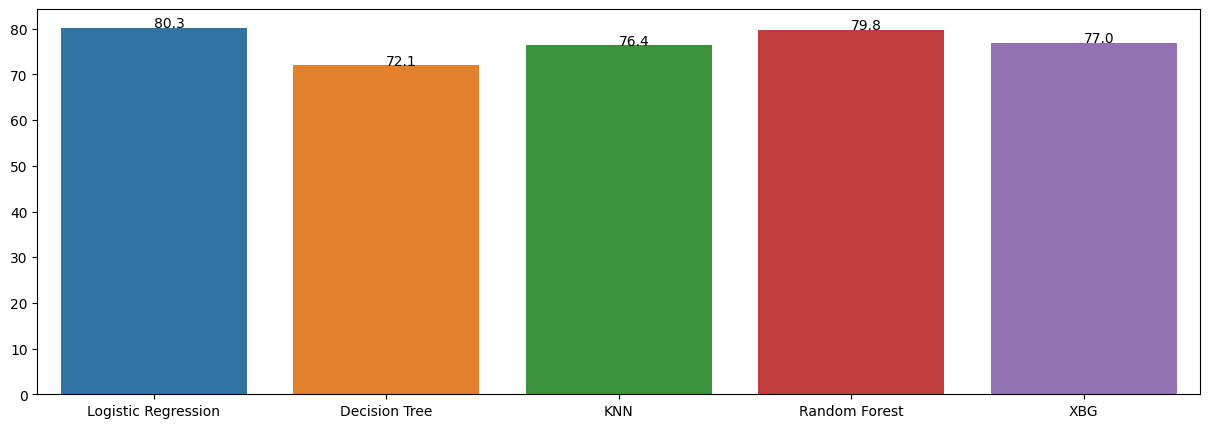

In [69]:
untuned_algo = [Log_reg_untune, dec_tree_untune, knn_untune, random_forest_untune, xgb_untune]
Algo_value_untune = []
for i in untuned_algo:
  Algo_value_untune.append(round(i,1))
Algo = ["Logistic Regression", "Decision Tree" , "KNN", "Random Forest", "XBG"]
plt.figure(figsize=(15,5))
def addlabels_untune(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], horizontalalignment = "left")
sns.barplot(x= Algo, y = untuned_algo)
addlabels_untune(Algo, Algo_value_untune)

####SMOTE Algorithm Graph

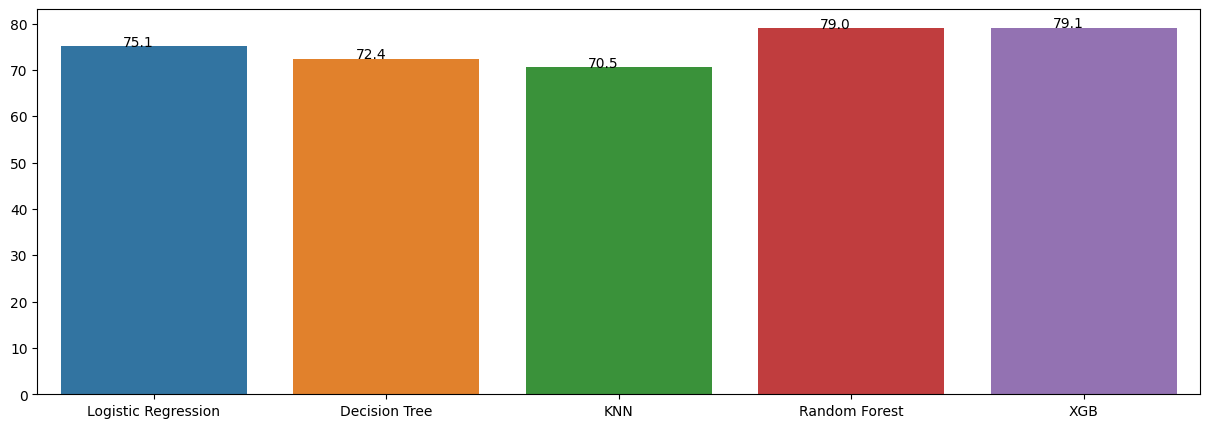

In [70]:
untuned_algo_smote = [lg_smote_score, dt_smote_score, knn_smote_score, rf_smote_score, xgb_smote_score]
Algo_value_untune_smote = []
for i in untuned_algo_smote:
  Algo_value_untune_smote.append(round(i,1))
Algo_smote = ["Logistic Regression", "Decision Tree" , "KNN", "Random Forest", "XGB"]
plt.figure(figsize=(15,5))
def addlabels_untune_smote(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], horizontalalignment = "right")
sns.barplot(x= Algo_smote, y = untuned_algo_smote)
addlabels_untune_smote(Algo_smote, Algo_value_untune_smote)

####Comparision

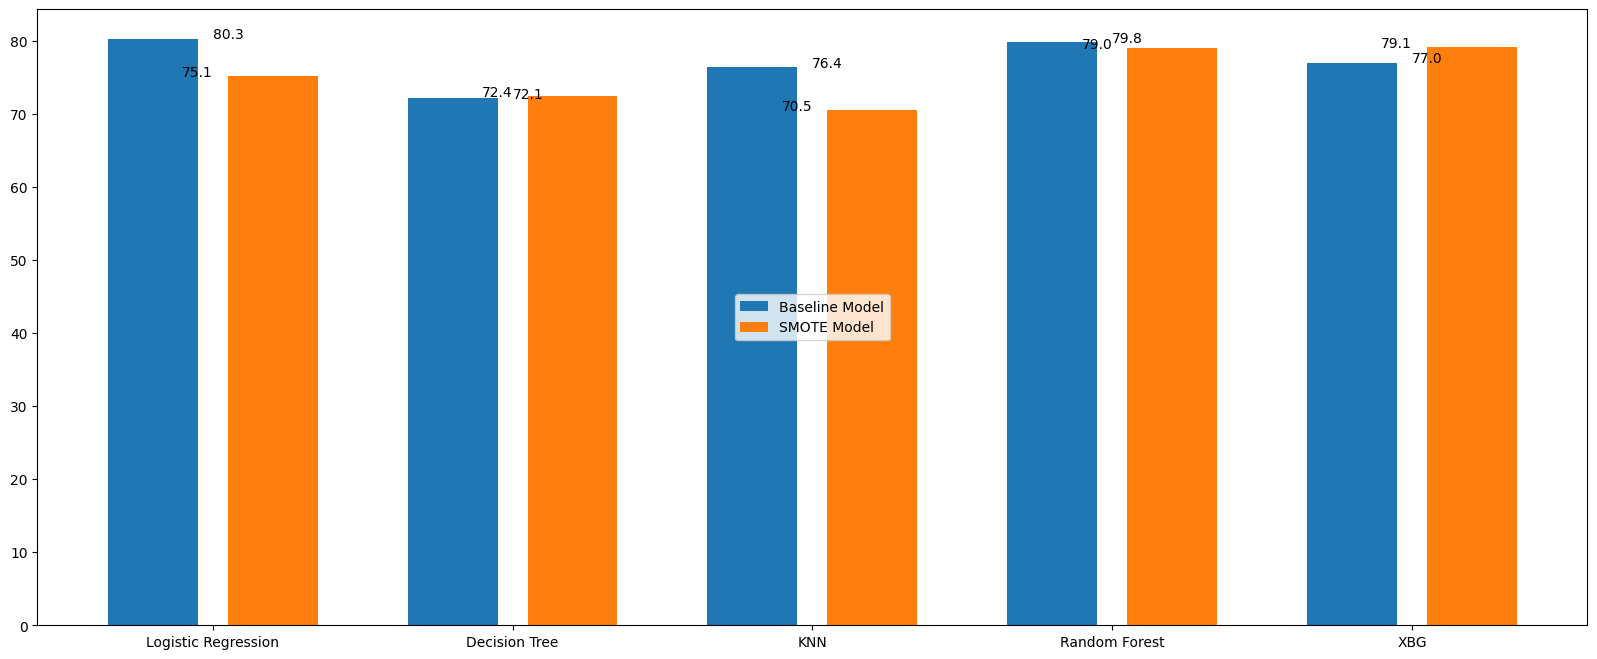

In [73]:
plt.figure(figsize=(20,8))
X_label_algo = np.arange(len(Algo))
plt.bar(X_label_algo-0.2, untuned_algo, 0.3, label = "Baseline Model")
plt.bar(X_label_algo+0.2, untuned_algo_smote, 0.3, label = "SMOTE Model")
plt.xticks(X_label_algo, Algo)
plt.legend(loc = "center")
addlabels_untune(Algo, Algo_value_untune)
addlabels_untune_smote(Algo_smote, Algo_value_untune_smote)

#**CONCLUSION**

**OBSERVATION**
* 